In [ ]:
#1. logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


logr=LogisticRegression()

df=pd.read_csv("/content/Iris (1).csv")

x = df.drop('Id', axis=1)
x = x.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

#print(train.coef_)
#print(train.intercept_)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))




0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#2. Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

nb=GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.4)

nb.fit(X_train,y_train)

y_pred1=nb.predict(X_test)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))


Naive Bayes:  0.9333333333333333


In [ ]:
# 3. KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

train=knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred))



0.9736842105263158


In [ ]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.9777777777777777


In [ ]:
# 5. Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))



0.9777777777777777


In [ ]:
# 6. Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.2)

gbm.fit(X_train,Y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(Y_test,y_pred))


GBM:  1.0


In [ ]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("/content/Iris (1).csv")

#Preparing X and Y

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
#print(X)
#print(Y)

# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828


[0.07314556 0.05596089 0.43990888 0.43098467]


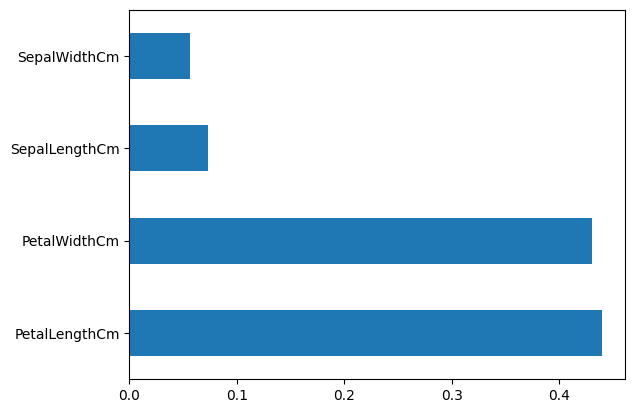

In [ ]:

#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [ ]:

#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)



      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]
0         Iris-setosa
1     

In [ ]:

#Categorical to Numerical
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace this with your actual dataset loading)
data = {
    'SepalLengthCm': [5.1, 4.9, 4.7, 4.6, 5.0],
    'SepalWidthCm': [3.5, 3.0, 3.2, 3.1, 3.6],
    'PetalLengthCm': [1.4, 1.4, 1.3, 1.5, 1.4],
    'PetalWidthCm': [0.2, 0.2, 0.2, 0.2, 0.2],
    'Species': ['setosa', 'setosa', 'versicolor', 'versicolor', 'setosa']
}

df = pd.DataFrame(data)

# Convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

print(df['Species'])


0    0
1    0
2    1
3    1
4    0
Name: Species, dtype: int64


In [ ]:

#Dealing with missing values
import pandas as pd

# Example DataFrame (replace this with your actual dataset loading)
data = {
    'Item_Weight': [20.0, None, 15.0, 25.0, None],
    'Outlet_Size': ['Small', 'Medium', None, 'Large', 'Medium']
}

df = pd.DataFrame(data)

# Check missing values
print(df.isnull().sum())

# Fill missing numerical values with mean, median, or mode
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)  # Using mean

# Fill missing categorical values with a specified category
df['Outlet_Size'].fillna('Medium', inplace=True)  # Using a specified category

print(df)


Item_Weight    2
Outlet_Size    1
dtype: int64
   Item_Weight Outlet_Size
0         20.0       Small
1         20.0      Medium
2         15.0      Medium
3         25.0       Large
4         20.0      Medium


In [11]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('/content/Iris (1).csv')

# Check how many entries are 'Iris-setosa'
a = (df['Species'] == 'Iris-setosa').sum()
print("Number of 'Iris-setosa' entries:", a)

# Define X and Y
X = df.drop('Species', axis=1)  # Features
Y = df['Species']  # Target variable

print("Initial class distribution:")
print(Counter(Y))

# Random oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
print("After RandomOverSampler:")
print(Counter(Y_resampled))

# Update Y to reflect oversampling
Y = Y_resampled

# Random undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print("After RandomUnderSampler:")
print(Counter(Y_resampled))


Number of 'Iris-setosa' entries: 50
Initial class distribution:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
After RandomOverSampler:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
After RandomUnderSampler:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


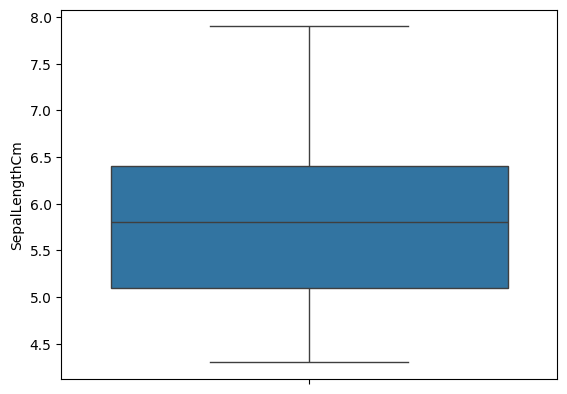

In [13]:

#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()


In [14]:

#Dealing with Outliers using Interquantile Range

print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64
1.3000000000000007
8.350000000000001
3.1499999999999986
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64


In [15]:


#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 